In [4]:
pip install opencv-python

Note: you may need to restart the kernel to use updated packages.


Chebyshev-Fourier Moments:
[[ 4.89600000e+08-3.00351530e-08j -7.48067542e+05-6.13033157e+07j
  -4.00114040e+08-1.53354136e+05j -1.64232306e+06+1.21004608e+08j
   3.67796296e+08+2.98694104e+05j  2.58773195e+05-9.36801677e+07j]
 [ 3.36280234e+05-2.50091204e+07j -5.52436847e+06+4.03287570e+05j
  -5.97848846e+05+1.39250477e+07j  1.02709036e+07+4.53681915e+04j
   6.66301015e+05-6.40155763e+06j -7.51653972e+06+3.30137787e+05j]
 [-4.53088069e+08-8.34332623e+04j  1.90006149e+05+5.21114797e+07j
   3.81294077e+08+1.76812347e+05j  1.10919963e+06-1.06245793e+08j
  -3.53590019e+08-2.92205468e+05j -7.69438856e+05+9.37909695e+07j]
 [-1.11485166e+06+5.23608686e+07j  1.56906886e+07-1.80832874e+05j
   6.94203264e+05-2.33536272e+07j -2.84900003e+07-1.07772175e+06j
  -5.75178631e+05+8.41908566e+06j  2.33201296e+07-5.84364447e+04j]
 [ 4.26506107e+08+1.82497998e+05j  2.22778018e+05-4.77018933e+07j
  -3.63924193e+08-1.82243166e+05j -7.99275366e+05+9.47580933e+07j
   3.39780851e+08+2.48917568e+05j  1.17466312

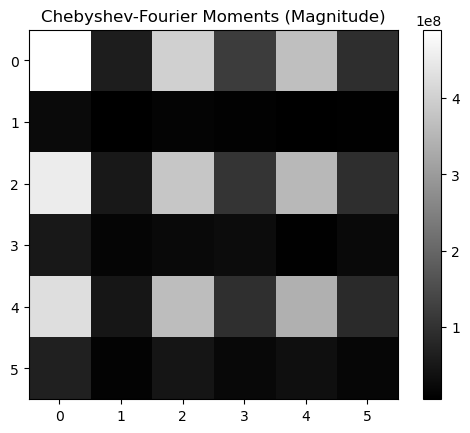

In [3]:
import numpy as np
import cv2
from scipy.special import eval_chebyt
import matplotlib.pyplot as plt

def compute_cfm(image, max_degree):
    """
    Compute Chebyshev-Fourier moments (CFM) of an input image.
    
    Parameters:
        image (2D numpy array): Grayscale image.
        max_degree (int): Maximum degree of the Chebyshev polynomial.
    
    Returns:
        cfm (2D numpy array): The computed Chebyshev-Fourier moments.
    """
    rows, cols = image.shape
    
    # Normalize the image coordinates to the range [-1, 1]
    x = np.linspace(-1, 1, cols)
    y = np.linspace(-1, 1, rows)
    X, Y = np.meshgrid(x, y)
    
    # Compute the Fourier transform of the image
    F_image = np.fft.fft2(image)
    F_image_shifted = np.fft.fftshift(F_image)  # Shift the zero frequency component to the center
    
    # Initialize an array to store the CFMs
    cfm = np.zeros((max_degree + 1, max_degree + 1), dtype=np.complex128)
    
    # Loop over degrees for Chebyshev polynomials
    for n in range(max_degree + 1):
        for m in range(max_degree + 1):
            # Compute the Chebyshev polynomial values
            Tn_X = eval_chebyt(n, X)
            Tm_Y = eval_chebyt(m, Y)
            
            # Compute the product of Chebyshev polynomials and the Fourier-transformed image
            cfm[n, m] = np.sum(F_image_shifted * Tn_X * Tm_Y)
    
    return cfm

image_path = "IMG_0612.jpg"
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# Define the maximum degree for Chebyshev polynomials
max_degree = 5  # change depending on the desired precision

cfm = compute_cfm(image, max_degree)

print("Chebyshev-Fourier Moments:")
print(cfm)
plt.imshow(np.abs(cfm), cmap='gray')
plt.colorbar()
plt.title('Chebyshev-Fourier Moments (Magnitude)')
plt.show()
